In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("cust_seg.csv", index_col=0)

In [3]:
df.head(10)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2
5,6,40,1,23,81,0.998,7.831,NaN,10.9
6,7,38,2,4,56,0.442,0.454,0.0,1.6
7,8,42,3,0,64,0.279,3.945,0.0,6.6
8,9,26,1,5,18,0.575,2.215,NaN,15.5
9,10,47,3,23,115,0.653,3.947,0.0,4.0


In [4]:
df["Defaulted"].value_counts()

0.0    517
1.0    183
Name: Defaulted, dtype: int64

In [5]:
df["Defaulted"] = df["Defaulted"].fillna(0)
df["Defaulted"].isna().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 850 entries, 0 to 849
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Id      850 non-null    int64  
 1   Age              850 non-null    int64  
 2   Edu              850 non-null    int64  
 3   Years Employed   850 non-null    int64  
 4   Income           850 non-null    int64  
 5   Card Debt        850 non-null    float64
 6   Other Debt       850 non-null    float64
 7   Defaulted        850 non-null    float64
 8   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 66.4 KB


In [7]:
scaler = StandardScaler() # Instantiates the Transformer
scaled_df = scaler.fit_transform(df)

In [8]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(scaled_df)

KMeans(n_clusters=2)

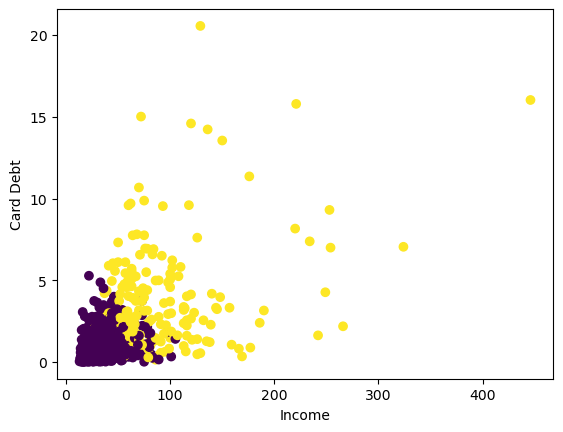

In [9]:
df["cluster"] = kmeans.labels_
plt.scatter(df["Income"], df["Card Debt"], c = df["cluster"])
plt.xlabel("Income")
plt.ylabel("Card Debt");


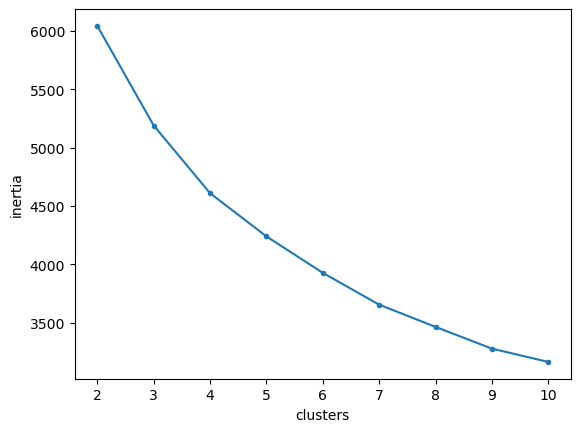

In [10]:
inertias = []

for k in range(2,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_df)
    inertias.append(kmeans.inertia_)
    
plt.plot(range(2,11), inertias, marker = ".")
plt.xlabel("clusters")
plt.ylabel("inertia");

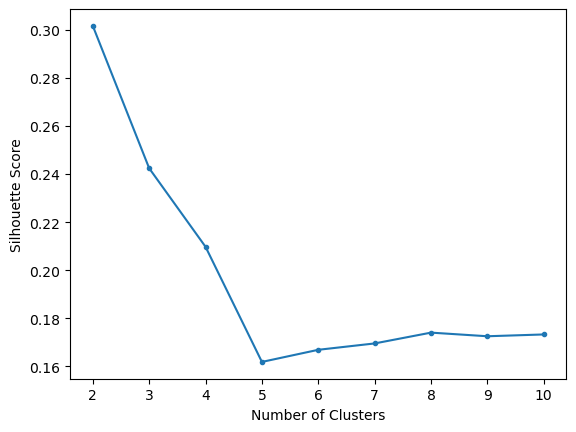

In [11]:
silhouette_scores = []
for i in range(2,11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(scaled_df)
    silhouette_scores.append(silhouette_score(scaled_df,
kmeans.labels_))
    
plt.plot(range(2,11), silhouette_scores, marker = ".")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score");

In [12]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(scaled_df)
silhouette_score(scaled_df, kmeans.labels_)

0.2994558682692341

In [13]:
kmeans2 = KMeans(n_clusters = 2)
kmeans3 = KMeans(n_clusters = 3)
kmeans2.fit(scaled_df)
kmeans3.fit(scaled_df)

KMeans(n_clusters=3)

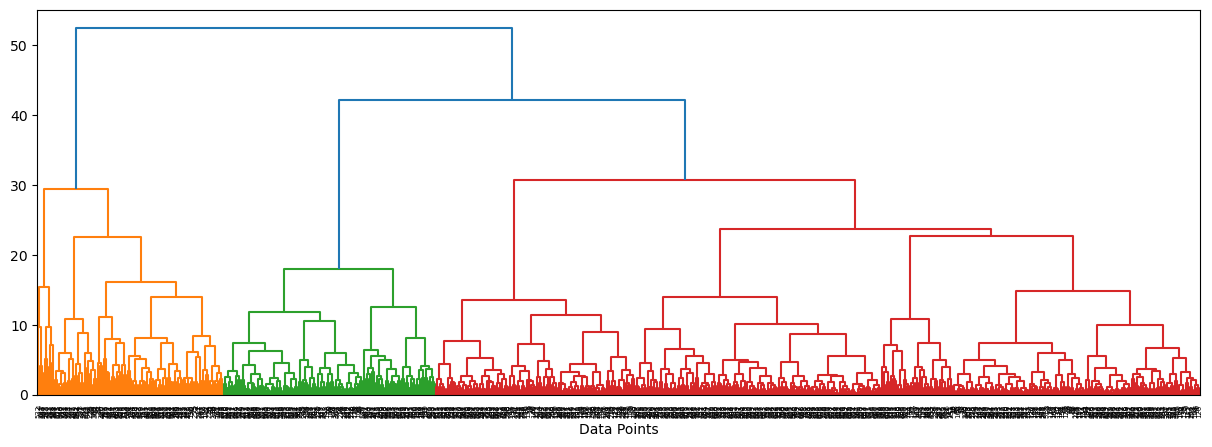

In [14]:
plt.figure(figsize = (15, 5))
sch.dendrogram(sch.linkage(scaled_df, method = "ward"))
plt.xlabel("Data Points");

- While not a requirement of the original project assignment, I added this as a visual aid to show the scope of how Clustered Data Points can be built and arranged.

# I would utilize between 3 clusters based on the results of my cluster data models. 